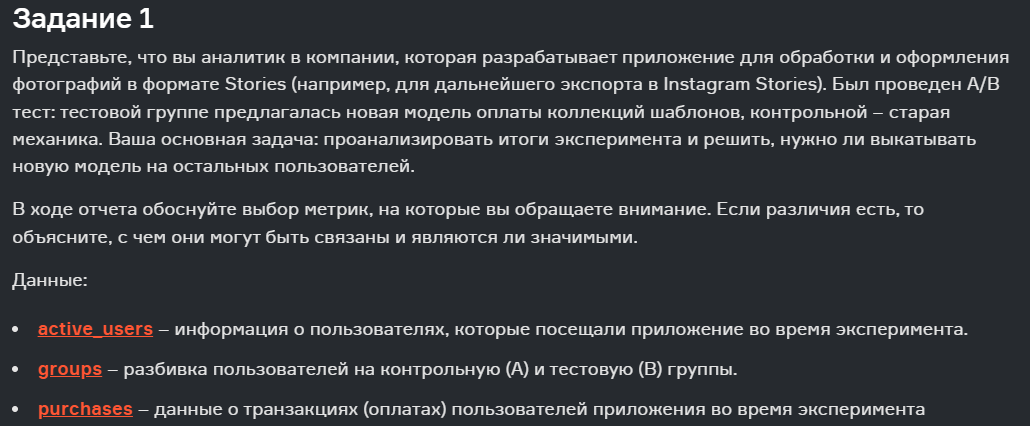

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

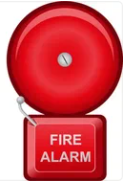

**Перед выполнением задания № 1 обозначим цветовую легенду (только для задания № 1) и условные обозначения, которые помогут ориентироваться в работе:**
* пользователи контрольной группы:
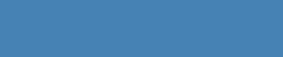

* пользователи тестовой группы:
     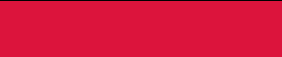

* без разделения на группы:
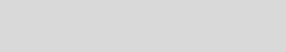

* **Всего пользователей** - кол-во пользователей в groups
* **Активные пользователи** - кол-во пользователей в users
* **Что-то купили** - кол-во пользователей в purchases

# EDA

In [2]:
users = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/B4QnY5D5EtKa-A')
users.head()

user_id country platform     sex
0     8029  Russia      ios    male
1     1735  Sweden      ios    male
2     7697  Russia  android    male
3     1421  Sweden  android  female
4     1704  Russia      ios    male

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   8341 non-null   int64 
 1   country   8341 non-null   object
 2   platform  8341 non-null   object
 3   sex       8341 non-null   object
dtypes: int64(1), object(3)
memory usage: 260.8+ KB


В наборе данных users всего 8341 наблюдений (только те пользователи, которые проявляли активность за время эксперимента), нулевые значение отсутствуют. Все столбцы с корректным типом данных:

**Столбцы:**
* идентификатор пользователя
* страна
* платформа телефона
* пол

In [4]:
groups = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/jP_BAw_oxS3law')
groups.head()

user_id group
0     9149     B
1     9150     B
2     9151     A
3     9152     B
4     9153     B

In [5]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  74576 non-null  int64 
 1   group    74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


В наборе данных groups содержатся данные о разделении пользователей на контрольную (А) и тестовую (В) группы.
В наборе содержится информация о всех пользователях, а не только о тех, кто проявлял активность во время эксперимента.

**Столбцы:**
* идентификатор пользователя
* группа



In [6]:
purchases = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/AmucCdboEaowhA')
purchases.head()

user_id  revenue
0     4412   1000.0
1     9000    701.0
2     9001    700.0
3     9002    702.0
4     5790   1002.0

In [7]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  541 non-null    int64  
 1   revenue  541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


В наборе данных purchases содержатся данные о транзакциях пользователей во время проведения эксперимента.

**Столбцы:**
* идентификатор пользователя
* выручка

*P.s. В задании о данном наборе данных говорится, что в нем содержится информация о транзакциях. Учитывая, что в наборе данных нет дубликатов user_id можно сделать вывод, что за время эксперимента пользователи совершили только по одной транзакции или что в задании не совсем верно указано описание и набор данных содержит информацию о пользователях, которые совершили покупку за время эксперимента, a revenue - сумма, которую они потратили за это время. Я придерживаюсь 2-ого варианта.*

**Соеденим имеющиеся наборы данных по следующему принципу (1 гипотеза):**
* groups & users - inner (набор данных groups содержит информацию о всех пользователях. Пользователи, которые не заходили в приложение не могли использовать новую модель оплаты, поэтому отсеим их);
* (groups & users) & purchases - left (информацию о том совершал/не совершал покупку будем использовать для оценки эффективности новой модели оплаты)

In [8]:
df = groups.merge(users, on = 'user_id').merge(purchases, on = 'user_id', how = 'left')
df.head()

user_id group country platform     sex  revenue
0     1488     B  Russia  android    male      NaN
1     5125     B  Russia      ios  female      NaN
2     3196     A  Russia      ios  female      NaN
3     1749     B  Russia  android    male      NaN
4     4994     B  Sweden  android    male      NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   8341 non-null   int64  
 1   group     8341 non-null   object 
 2   country   8341 non-null   object 
 3   platform  8341 non-null   object 
 4   sex       8341 non-null   object 
 5   revenue   392 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 456.1+ KB


**Соеденим имеющиеся наборы данных по следующему принципу (2 гипотеза):**
* groups & users - inner;
* (groups & users) & purchases - inner.

In [10]:
df_2 = groups.merge(users, on = 'user_id').merge(purchases, on = 'user_id')
df_2.head()

user_id group country platform     sex  revenue
0     4455     B  Russia  android  female    599.0
1     6473     B  Sweden      ios  female   3050.0
2     2814     B  Sweden  android  female    300.0
3     1673     A  Sweden  android    male   2899.0
4     5505     B  Russia  android    male    299.0

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   392 non-null    int64  
 1   group     392 non-null    object 
 2   country   392 non-null    object 
 3   platform  392 non-null    object 
 4   sex       392 non-null    object 
 5   revenue   392 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 21.4+ KB


Кол-во наблюдений в наборе данных для проверки 2-ой гипотезы и количество non-null в наборе данный для проверки 1-ой гипотезы меньше, чем в наборе данных purchases. Соответственно, есть объекты в purchases, которых нет в users.

In [12]:
error_users = []
for i in purchases['user_id']:
    if i not in users['user_id']:
        error_users.append(i)
    else:
        continue
        
print(f'''Количество пользователей с некорректными данными:
{len(error_users)}''')

Количество пользователей с некорректными данными:
149


Согласно имеющимся данным есть пользователи, которые совершили покупки во время эксперимента не заходя в приложение. Соответственно, в данных есть ошибка - либо информация об этих пользователях не была добавлена в users, либо в purchases у этих пользователей некорректно указана информация в столбце revenue. Учитывая, что выяснить недостающую информацию нет возможности, то придётся не учитывать этих пользователей в дальнейшем анализе.

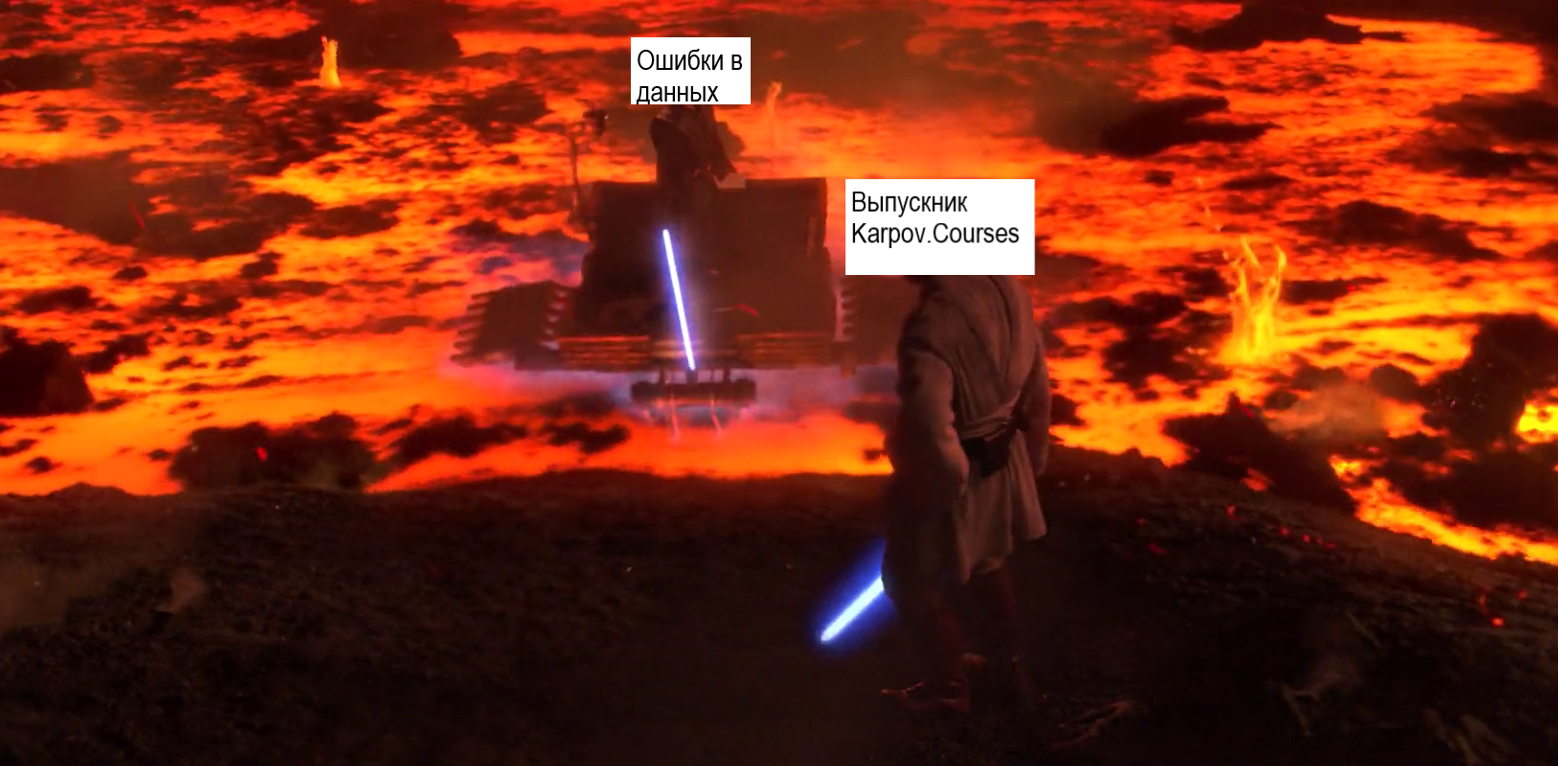

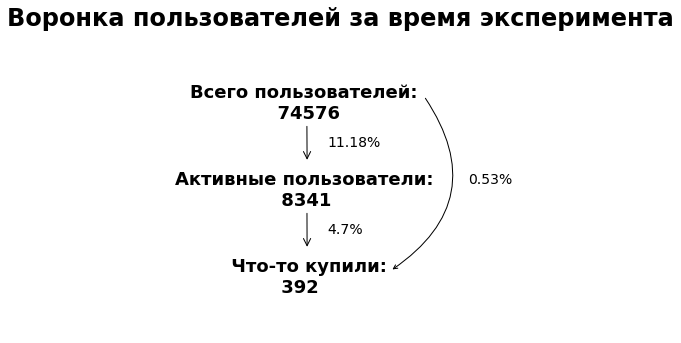

In [13]:
plt.figure()

plt.annotate(s = f'''Всего пользователей: 
              {len(groups)}''', 
             xy = (0.6, 0.8), 
             xytext = (0.25, 1), 
             color = 'black', fontweight = 'bold', 
             fontsize = 18,
             arrowprops = dict(
                 color ='black', 
                 arrowstyle = '->'))

plt.annotate(s = f'''Активные пользователи: 
                 {len(users)}''', 
             xy = (0.6, 0.4), 
             xytext = (0.204, 0.6), 
             color = 'black', fontweight = 'bold', 
             fontsize = 18,
             arrowprops = dict(
                 color ='black', 
                 arrowstyle = '->'))

plt.annotate(s = f'''         Что-то купили: 
                 {len(df_2)}''', 
             xy = (0.6, 0), 
             xytext = (0.204, 0.2), 
             color = 'black', fontweight = 'bold', 
             fontsize = 18)

plt.annotate(s = '',
             xy = (0.85, 0.3), 
             xytext = (0.95, 1.1),
             arrowprops = dict(
                 color = 'black', 
                 arrowstyle = '->', 
                 connectionstyle = 'arc3,rad=-0.5')
            )

plt.text(s = f'''{round(len(users) / len(groups) * 100, 2)}%''',
         x = 0.66,
         y = 0.87,
         color = 'black',
         size = 14)

plt.text(s = f'''{round(len(df_2) / len(users) * 100, 2)}%''',
         x = 0.66,
         y = 0.47,
         color = 'black',
         size = 14)

plt.text(s = f'''{round(len(df_2) / len(groups) * 100, 2)}%''',
         x = 1.08,
         y = 0.7,
         color = 'black',
         size = 14)

plt.axis('off')

plt.title('Воронка пользователей за время эксперимента',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.4,
          x = 0.7)

plt.show()

**Гипотезы:** Так как доработка касается оплаты, то можно предположить, что она могла оказать влияние на конверсию и выручку (к примеру, был добавлен новый способ оплаты или упрощен существующий механизм, что побудило пользователей совершкать покупки или в принципе у них появилась такая возможность). Сначала проверим гипотезу, что изменение модели оплаты повлияло на кол-во пользователей, которые совершили покупку за время эксперимента.

# Гипотеза 1. Новая модель оплаты оказала/не оказала влияние на конверсию.
**Исследуем кол-во активных пользователей по группам**

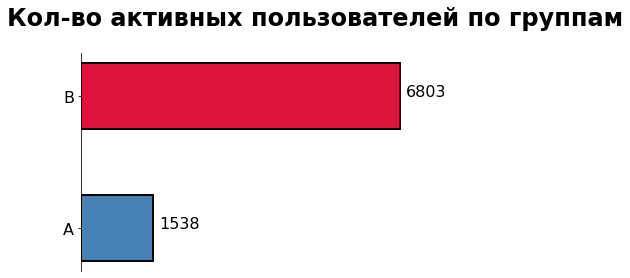

In [14]:
group_by_group = df \
    .groupby('group', as_index = False) \
    .agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'})


plt.figure()

plt.barh(y = group_by_group['group'], 
         width = group_by_group['count'],
         height = 0.5,
         color = ['steelblue', 'crimson'],
         linewidth = 2,
         edgecolor = 'black')
sns.despine(bottom = True)
plt.yticks(size = 16)
plt.xticks([])
plt.title('Кол-во активных пользователей по группам',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.7)
for i in range(2):
    plt.text(x = group_by_group['count'][i] + 125,
             y = i,
             s = group_by_group['count'][i],
             size = 16)
plt.show()

In [15]:
groups['group'].value_counts()

B    59883
A    14693
Name: group, dtype: int64

Из графика видно, что количество активных пользователей в тествой группе (В) значительно превышает количество активных пользователей в контрольной группе (А). 

*P.s. Интересеное решение проверить доработку на большей части пользователей.*

**Теперь исследуем кол-во активных пользователей по группам и странам**

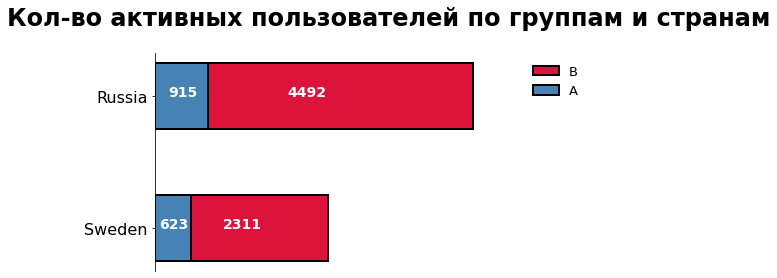

% тестовой группы из России - 83%
% тестовой группы из Швеции -79%


In [16]:
by_group_country = pd.crosstab(df['group'], df['country'], margins = True).reset_index()

plt.figure()

plt.barh(width = [by_group_country.iloc[1, 1: 3].values[1] + by_group_country.iloc[0, 1: 3].values[1], 
                [by_group_country.iloc[1, 1: 3].values[0] + by_group_country.iloc[0, 1: 3].values[0]]], 
         y = ['Sweden', 'Russia'],
         color = 'crimson',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)
plt.barh(width = [by_group_country.iloc[0, 1: 3].values[0], [by_group_country.iloc[0, 1: 3].values[1]]], 
         y = ['Russia', 'Sweden'],
         color = 'steelblue',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)

sns.despine(bottom = True)

plt.yticks(size = 16)
plt.xticks([])

plt.title('Кол-во активных пользователей по группам и странам',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.7)

plt.text(x = by_group_country['Russia'][0]/4,
         y = 1,
         s = by_group_country['Russia'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_country['Russia'][1]/2,
         y = 1,
         s = by_group_country['Russia'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_country['Sweden'][0]/8,
         y = 0,
         s = by_group_country['Sweden'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_country['Sweden'][1]/2,
         y = 0,
         s = by_group_country['Sweden'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')

plt.legend(labels = ['B', 'A'],
           loc = 1,
           bbox_to_anchor = (1.3, 1),
           fontsize = 13,
           edgecolor = 'white')

plt.show()

print(f'''% тестовой группы из России - {round(by_group_country['Russia'][1] / by_group_country['Russia'][2] * 100)}%
% тестовой группы из Швеции -{round(by_group_country['Sweden'][1] / by_group_country['Sweden'][2] *100)}%''')

Из графика видно, что пользователей из России больше, чем из Швеции. 

% тествой группы из России не значительно больше % тестовой группы из швеции.

**Далее исследуем количество активных пользователей по группам и платформам**

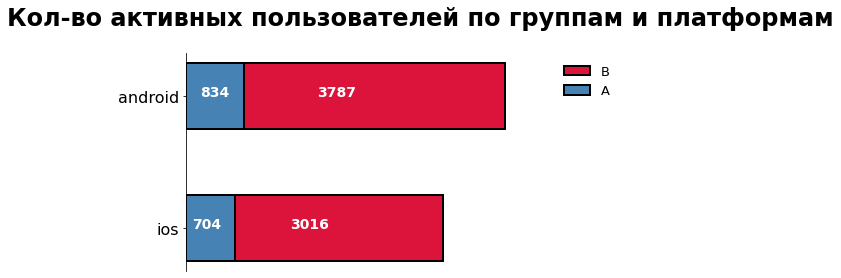

% тестовой группы на android - 82%
% тестовой группы на ios - 81%


In [17]:
by_group_platform = pd.crosstab(df['group'], df['platform'], margins = True).reset_index()

plt.figure()

plt.barh(width = [by_group_platform.iloc[1, 1: 3].values[1] + by_group_platform.iloc[0, 1: 3].values[1], 
                [by_group_platform.iloc[1, 1: 3].values[0] + by_group_platform.iloc[0, 1: 3].values[0]]], 
         y = ['ios', 'android'],
         color = 'crimson',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)
plt.barh(width = [by_group_platform.iloc[0, 1: 3].values[0], [by_group_platform.iloc[0, 1: 3].values[1]]], 
         y = ['android', 'ios'],
         color = 'steelblue',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)

sns.despine(bottom = True)

plt.yticks(size = 16)
plt.xticks([])

plt.title('Кол-во активных пользователей по группам и платформам',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.7)

plt.text(x = by_group_platform['android'][0]/4,
         y = 1,
         s = by_group_platform['android'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_platform['android'][1]/2,
         y = 1,
         s = by_group_platform['android'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_platform['ios'][0]/8,
         y = 0,
         s = by_group_platform['ios'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_platform['ios'][1]/2,
         y = 0,
         s = by_group_platform['ios'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')

plt.legend(labels = ['B', 'A'],
           loc = 1,
           bbox_to_anchor = (1.3, 1),
           fontsize = 13,
           edgecolor = 'white')

plt.show()

print(f'''% тестовой группы на android - {round(by_group_platform['android'][1] / by_group_platform['android'][2] * 100)}%
% тестовой группы на ios - {round(by_group_platform['ios'][1] / by_group_platform['ios'][2] *100)}%''')

Пользователей на android больше, чем на ios. Доли пользователей из тествой группы примерно одинаковы для обеих платформ.

**Теперь исследуем количество активных пользователей по группам и полу**

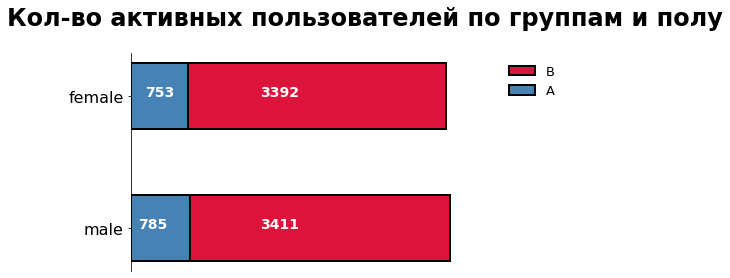

% тестовой группы (женщины) - 82%
% тестовой группы (мужчины) - 81%


In [18]:
by_group_sex = pd.crosstab(df['group'], df['sex'], margins = True).reset_index()

plt.figure()

plt.barh(width = [by_group_sex.iloc[1, 1: 3].values[1] + by_group_sex.iloc[0, 1: 3].values[1], 
                [by_group_sex.iloc[1, 1: 3].values[0] + by_group_sex.iloc[0, 1: 3].values[0]]], 
         y = ['male', 'female'],
         color = 'crimson',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)
plt.barh(width = [by_group_sex.iloc[0, 1: 3].values[0], [by_group_sex.iloc[0, 1: 3].values[1]]], 
         y = ['female', 'male'],
         color = 'steelblue',
         linewidth = 2,
         edgecolor = 'black',
         height = 0.5)

sns.despine(bottom = True)

plt.yticks(size = 16)
plt.xticks([])

plt.title('Кол-во активных пользователей по группам и полу',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.7)

plt.text(x = by_group_sex['female'][0]/4,
         y = 1,
         s = by_group_sex['female'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_sex['female'][1]/2,
         y = 1,
         s = by_group_sex['female'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_sex['male'][0]/8,
         y = 0,
         s = by_group_sex['male'][0],
         size = 14,
         color = 'white',
         fontweight = 'bold')
plt.text(x = by_group_sex['male'][1]/2,
         y = 0,
         s = by_group_sex['male'][1],
         size = 14,
         color = 'white',
         fontweight = 'bold')

plt.legend(labels = ['B', 'A'],
           loc = 1,
           bbox_to_anchor = (1.3, 1),
           fontsize = 13,
           edgecolor = 'white')

plt.show()

print(f'''% тестовой группы (женщины) - {round(by_group_sex['female'][1] / by_group_sex['female'][2] * 100)}%
% тестовой группы (мужчины) - {round(by_group_sex['male'][1] / by_group_sex['male'][2] *100)}%''')

Наблюдаем почти одинаковое количество мужчин и женщины, и % тестовых групп.

**Проведенный EDA показал следующие результаты:**
* **группа** - кол-во пользователей из тествой группы значительно больше кол-ва пользователей из контрольной группы.
* **страна** - российских пользователей больше, чем шведских; доля тествой группы в России больше доли тествой группы в Швеции.
* **платформа** - у большинства пользователей android; доля тесовой группы на android немного больше тествой группы на ios.
* **пол** - почти одинковое кол-во мужчин и женщин; доля тествой группы среди женщин немного больше тесовой группы среди мужчин.

Добавим новую колонку, в которой будет отражена информация совершал ли пользователь за время эксперимента покупку или нет для проверки первой гипотезы.

In [19]:
df['revenue'].fillna(0, inplace = True)
purchase_list = []
for i in df['revenue']:
    if i == 0:
        x = 'no'
    else:
        x = 'yes'
    purchase_list.append(x)
df['purchase'] = purchase_list
df.head()

user_id group country platform     sex  revenue purchase
0     1488     B  Russia  android    male      0.0       no
1     5125     B  Russia      ios  female      0.0       no
2     3196     A  Russia      ios  female      0.0       no
3     1749     B  Russia  android    male      0.0       no
4     4994     B  Sweden  android    male      0.0       no

**Исследуем кол-во пользователей, которые совершили/не совершили покупку за время эксперимента.**

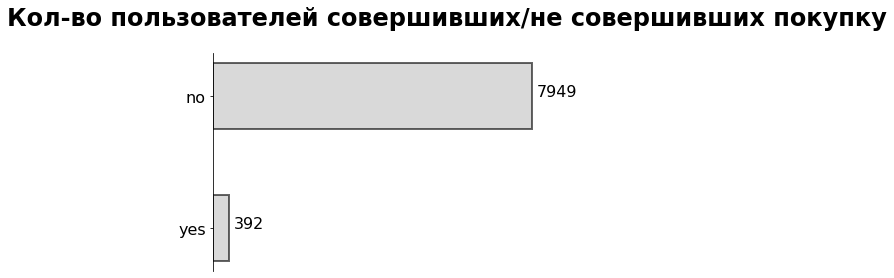

Конверсия = 4.7%


In [20]:
group_by_purchase = df \
    .groupby('purchase', as_index = False) \
    .agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'}) \
    .sort_values('count') \
    .reset_index(drop = True)


plt.figure()

plt.barh(y = group_by_purchase['purchase'], 
         width = group_by_purchase['count'],
         height = 0.5,
         color = 'silver',
         linewidth = 2,
         edgecolor = 'black',
         alpha = 0.6)

sns.despine(bottom = True)

plt.yticks(size = 16)
plt.xticks([])

plt.title('Кол-во пользователей совершивших/не совершивших покупку',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.7)

for i in range(2):
    plt.text(x = group_by_purchase['count'][i] + 125,
             y = i,
             s = group_by_purchase['count'][i],
             size = 16)
    
plt.show()

print(f'''Конверсия = {round(group_by_purchase['count'][0] / group_by_purchase['count'].sum() * 100, 2)}%''')

Из графика видно, что лишь малая группая пользователей за время проведения эксперимента совершила покупку. 

**Далее рассмотрим конверсию в разрезе групп.**

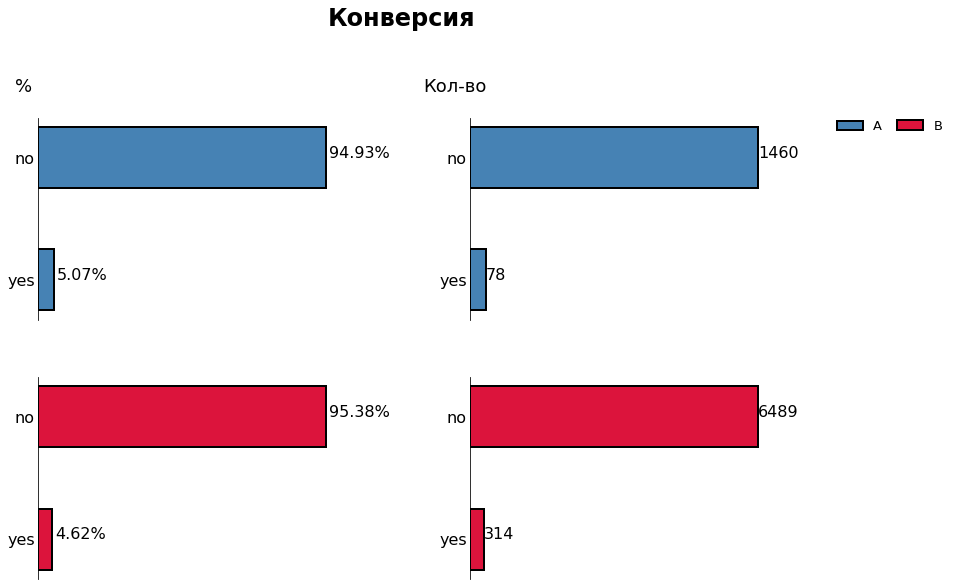

In [21]:
control = df[df['group'] == 'A']
control_by_purchase = control \
    .groupby('purchase', as_index = False) \
    .agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'}) \
    .sort_values('count') \
    .reset_index(drop = True)
control_by_purchase['percentage'] = round(control_by_purchase['count'] / sum(control_by_purchase['count']) * 100, 2)

test = df[df['group'] == 'B']
test_by_purchase = test \
    .groupby('purchase', as_index = False) \
    .agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'}) \
    .sort_values('count') \
    .reset_index(drop = True)
test_by_purchase['percentage'] = round(test_by_purchase['count'] / sum(test_by_purchase['count']) * 100, 2)

fig = plt.figure()

# percentage

ax0 = fig.add_axes([0, 0, 0.7, 0.7])
ax1 = fig.add_axes([0, -0.9, 0.7, 0.7])

ax0.barh(y = control_by_purchase['purchase'], 
         width = control_by_purchase['percentage'],
         height = 0.5,
         color = 'steelblue',
         edgecolor = 'black',
         linewidth = 2)
ax1.barh(y = test_by_purchase['purchase'], 
         width = test_by_purchase['percentage'],
         height = 0.5,
         color = 'crimson',
         edgecolor = 'black',
         linewidth = 2)

ax0.set_title(
    label ='%',
    x = -0.05,
    y = 1.1,
    color = 'black',
    fontsize = 18)

ax0.set_xticks([])
ax1.set_xticks([])
ax0.tick_params(length=0, width=0, colors='black', grid_color='black', labelsize = 16)
ax1.tick_params(length=0, width=0, colors='black', grid_color='black', labelsize = 16)

for i in range(2):
    ax0.text(x = control_by_purchase['percentage'][i]+1,
             y = i,
             s = f'''{control_by_purchase['percentage'][i]}%''',
             size = 16)
for i in range(2):
    ax1.text(x = test_by_purchase['percentage'][i]+1,
             y = i,
             s = f'''{test_by_purchase['percentage'][i]}%''',
             size = 16)

# count

ax2 = fig.add_axes([1, 0, 0.7, 0.7])
ax3 = fig.add_axes([1, -0.9, 0.7, 0.7])

ax2.barh(y = control_by_purchase['purchase'], 
         width = control_by_purchase['count'],
         height = 0.5,
         color = 'steelblue',
         edgecolor = 'black',
         linewidth = 2)

ax3.barh(y = test_by_purchase['purchase'], 
         width = test_by_purchase['count'],
         height = 0.5,
         color = 'crimson',
         edgecolor = 'black',
         linewidth = 2)

ax2.set_title(
    label ='Кол-во',
    x = -0.05,
    y = 1.1,
    color = 'black',
    fontsize = 18)

ax2.set_xticks([])
ax3.set_xticks([])
ax2.tick_params(length=0, width=0, colors='black', grid_color='black', labelsize = 16)
ax3.tick_params(length=0, width=0, colors='black', grid_color='black', labelsize = 16)

for i in range(2):
    ax2.text(x = control_by_purchase['count'][i],
             y = i,
             s = control_by_purchase['count'][i],
             size = 16)
for i in range(2):
    ax3.text(x = test_by_purchase['count'][i],
             y = i,
             s = test_by_purchase['count'][i],
             size = 16)

sns.despine(bottom = True)

ax2.legend(
           labels = 'A',
           loc = 1,
           bbox_to_anchor = (1.4, 1.05),
           fontsize = 13,
           edgecolor = 'white')
ax3.legend(
           labels = 'B',
           loc = 1,
           bbox_to_anchor = (1.6, 2.336),
           fontsize = 13,
           edgecolor = 'white')

plt.text(
    s = 'Конверсия',
    x = -3222,
    y = 4.2,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.show()

Из графика видно, что конверсия в контрольной и тестовой группах почти одинакова. Проверим стат. значимость с помощью хи-квадрата.

In [22]:
prob = 0.95
stat, p, dof, expected = stats.chi2_contingency([control_by_purchase['percentage'], test_by_purchase['percentage']])
alpha = 1.0 - prob
if p <= alpha:
    print('Reject H0')
else:
    print('No reject H0')

No reject H0


Тест хи-квадрат показал, что модель оплаты не оказала стат. значимого влияния на конверсию.

С помощью критерия Кохрана-Мантеля-Ханзеля проверим оказывает ли влияние новая модель оплаты на конверсию в разрезе описательных параметров.

In [23]:
from statsmodels.stats.contingency_tables import StratifiedTable
for i in ['country', 'platform', 'sex']:
    print(f'Стратифицирующая переменная - {i}')
    print(StratifiedTable.from_data('group', 'purchase', i, df).summary())
    print()
    print()

Стратифицирующая переменная - country
                   Estimate   LCB    UCB 
-----------------------------------------
Pooled odds           0.915   0.709 1.181
Pooled log odds      -0.089  -0.343 0.166
Pooled risk ratio     0.996              
                                         
                 Statistic P-value 
-----------------------------------
Test of OR=1         0.463   0.496 
Test constant OR     0.020   0.886 
                       
-----------------------
Number of tables    2  
Min n            2934  
Max n            5407  
Avg n            4170  
Total n          8341  
-----------------------


Стратифицирующая переменная - platform
                   Estimate   LCB    UCB 
-----------------------------------------
Pooled odds           0.907   0.703 1.170
Pooled log odds      -0.098  -0.352 0.157
Pooled risk ratio     0.995              
                                         
                 Statistic P-value 
-----------------------------------
Test of O

Из полученных результатов можем сделать вывод, что новая модель оплаты не оказывает влияния на конверсию и это справедливо для всех страт.

**Вывод по гипотезе 1:** добавление новой модели оплаты не оказало стат. значимого влияния на кол-во пользователей, которые совершили покупки. Теперь проверим вторую гипотезу.

# Гипотеза 2. Новая модель оплаты оказала/не оказала влияние на выручку.
Ранее был подговлен набор данных для проверки 2-ой гипотезы:

In [24]:
df_2.head()

user_id group country platform     sex  revenue
0     4455     B  Russia  android  female    599.0
1     6473     B  Sweden      ios  female   3050.0
2     2814     B  Sweden  android  female    300.0
3     1673     A  Sweden  android    male   2899.0
4     5505     B  Russia  android    male    299.0

In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   392 non-null    int64  
 1   group     392 non-null    object 
 2   country   392 non-null    object 
 3   platform  392 non-null    object 
 4   sex       392 non-null    object 
 5   revenue   392 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 21.4+ KB


**Исследуем соотношение групп среди пользователей, которые совершили покупки за время эксперимента**

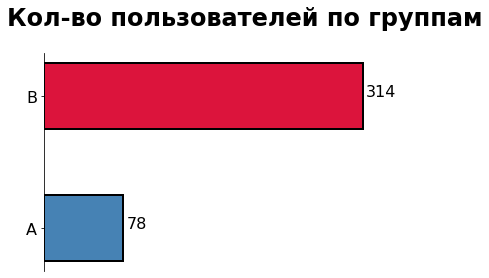

In [26]:
group_by_group = df_2 \
    .groupby('group', as_index = False) \
    .agg({'user_id' : 'count'}) \
    .rename(columns = {'user_id' : 'count'})


plt.figure()

plt.barh(y = group_by_group['group'], 
         width = group_by_group['count'],
         height = 0.5,
         color = ['steelblue', 'crimson'],
         linewidth = 2,
         edgecolor = 'black')

sns.despine(bottom = True)

plt.yticks(size = 16)
plt.xticks([])

plt.title('Кол-во пользователей по группам',
          size = 24,
          color = 'black',
          fontweight = 'bold',
          y = 1.1,
          x = 0.6)
for i in range(2):
    plt.text(x = group_by_group['count'][i]+3,
             y = i,
             s = group_by_group['count'][i],
             size = 16)
plt.show()

Из представленных данных видно, что пользователей из тествой группы ~ в 4 раза больше.

**Исследуем распределение выручки.**

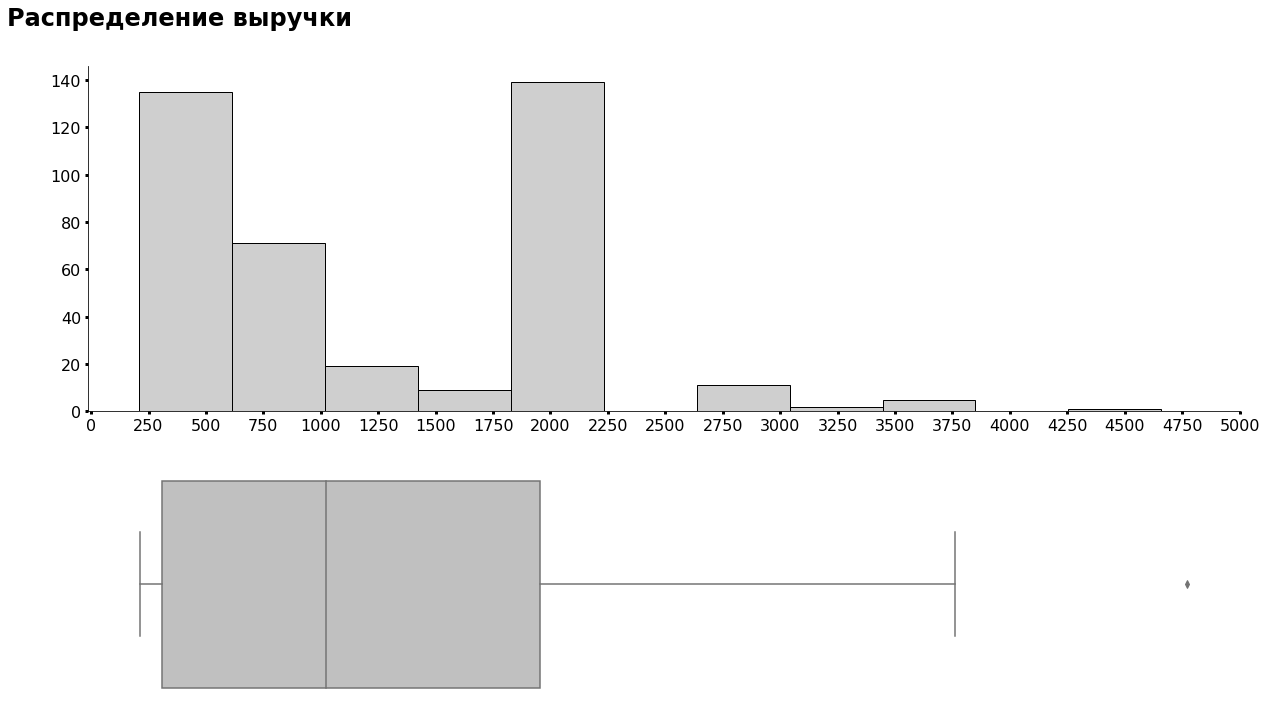

p-value (shapiro) - 1.768322559841976e-17


In [27]:
fig = plt.figure(figsize = (16, 6))

ax0 = fig.add_axes([0, 0, 1, 0.8])
ax1 = fig.add_axes([0,-0.7, 1, 0.6])

sns.histplot(
    x = df_2['revenue'],
    color = 'silver',
    ax = ax0)

sns.boxplot(
    x = df_2['revenue'],
    color = 'silver')

ax1.axis('off')
sns.despine()

ax0.set_xticks(range(0, 5001, 250))
ax0.tick_params(length=3, width=3, colors='black', grid_color='black', labelsize = 16)

ax0.set_xlabel('')
ax1.set_xlabel('')
ax0.set_ylabel('')
ax1.set_ylabel('')

ax0.set_title(
    label = 'Распределение выручки',
    x = 0.08,
    y = 1.1,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.show()

print(f"p-value (shapiro) - {stats.shapiro(df_2['revenue'])[1]}")

Распределение не является нормальным. Имеются ярко выраженные выбросы, наблюдается 2 ярко выраженные вершины. Также было подтверждено с помощью теста Шапиро-Уилка.

**Исследуем распределения по группам.**

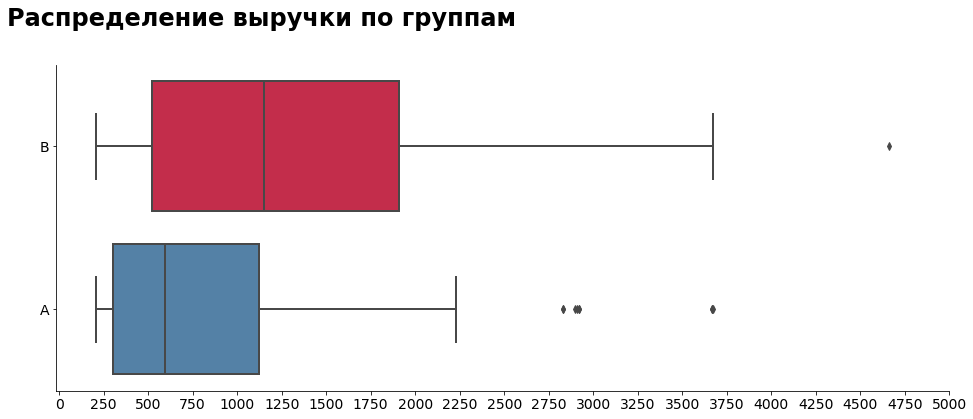


Тестовая группа:
медиана = 1151.0
p-value (shapiro) - 1.665431681028873e-16

Контрольная группа:
медиана = 596.0
p-value (shapiro) - 1.5417730980793465e-10


In [28]:
plt.figure(figsize = (16, 6))

sns.boxplot(
    y = df_2['group'],
    x = df_2['revenue'],
    palette = ['crimson', 'steelblue'],
    linewidth = 2)

sns.despine()

plt.xticks(range(0, 5001, 250),
           color = 'black',
           fontsize = 14)

plt.yticks(color = 'black',
           fontsize = 14)

plt.xlabel('')
plt.ylabel('')

plt.title(
    label = 'Распределение выручки по группам',
    x = 0.23,
    y = 1.1,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.show()

print()
print('Тестовая группа:')
print(f'''медиана = {df_2[df_2['group'] == 'B']['revenue'].median()}''')
print(f"p-value (shapiro) - {stats.shapiro(df_2[df_2['group'] == 'B']['revenue'])[1]}")
print()
print('Контрольная группа:')
print(f'''медиана = {df_2[df_2['group'] == 'A']['revenue'].median()}''')
print(f"p-value (shapiro) - {stats.shapiro(df_2[df_2['group'] == 'A']['revenue'])[1]}")

Из графика видно, что медианное значение выручки у тестовой группы значительно превышает медианное значение контрольной группы.

**Выбор стат. критерия.**

Как правило, если данные - количественные, а выборки - независимые, то используются следующие критерии:
* T-test
* Mann-Whitney U test
* bootstrap.

Для T-test есть ограничения - нормальность распределений и гомогенность дисперсий. Предыдущий анализ показал, наши выборки имеют ненормальное распределение.

Mann-Whitney U test - нет ограничений, но сложен в интерпретации.

bootstrap - рекомендовано использовать на выборках с 1000+ наблюдений.

Основываясь на вышеописанном наиболее корректный вариант в данном случае применение Mann-Whitney U test, но я бы хотел посмотреть на результаты всех тестов.

**Mann-Whitney U test**

In [29]:
alpha = 0.05
stat, p = stats.mannwhitneyu(df_2[df_2['group'] == 'A']['revenue'], df_2[df_2['group'] == 'B']['revenue'])
if p <= alpha:
    print('Reject H0')
else:
    print('No reject H0')
print(p)

Reject H0
0.00023939080114586078


*Mann-Whitney U test показал, что нулевая гипотеза о равенстве распределений отклоняется.*

**T-test**

In [30]:
alpha = 0.05
stat, p = stats.ttest_ind(df_2[df_2['group'] == 'A']['revenue'], df_2[df_2['group'] == 'B']['revenue'], equal_var = False)
if p <= alpha:
    print('Reject H0')
else:
    print('No reject H0')
print(p)

Reject H0
0.005065883116025021


*T-test также отклонил нулевую гипотезу о равенстве средних.*

**bootstrap**

In [31]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
    print('p-value = ', p_value)
    
bootet_data_median = get_bootstrap(
    data_column_1 = df_2[df_2['group'] == 'A']['revenue'], 
    data_column_2 = df_2[df_2['group'] == 'B']['revenue'], 
    boot_it = 1000, 
    statistic = np.median, 
    bootstrap_conf_level = 0.95 
)

p-value =  2.108812795828031e-05


*bootstrap также отклонил нулевую гипотезу о равенстве медиан.*

**Все проведенные тесты отклонили нулевую гипотезу. Выручка в тестовой группе больше и это является стат. значимым результатом.**

*Если бы результаты тестов различались в части принятия/отклонения гипотезы, то я в данном случае отдал бы предпочтение Манн-Уитни, учитывая характеристики нашей выборки.*

Для интереса изучим влияние новой модели оплаты в разрезе описательных параметров.

**Исследуем распределение выручки по группам в разрезе стран.**

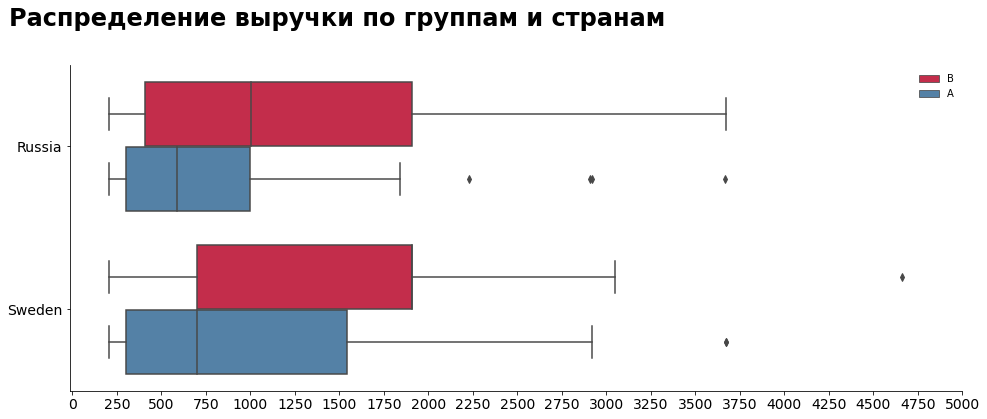

In [32]:
plt.figure(figsize = (16, 6))

sns.boxplot(
    x = df_2['revenue'],
    y = df_2['country'],
    hue = df_2['group'],
    palette = ['crimson', 'steelblue'])

plt.xticks(range(0, 5001, 250),
           color = 'black',
           fontsize = 14)

plt.yticks(color = 'black',
           fontsize = 14)

plt.xlabel('')
plt.ylabel('')

plt.title(
    label = 'Распределение выручки по группам и странам',
    x = 0.3,
    y = 1.1,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.legend(
    edgecolor = 'white',
    loc = 1)

sns.despine()

plt.show()

Проверим стат. значимость между распределениями в разрезе стран.

In [33]:
for i in ['Russia', 'Sweden']:
    print(f'Результат для {i}')
    stat, p = stats.mannwhitneyu(df_2[df_2['country'] == i][df_2[df_2['country'] == i]['group'] == 'A']['revenue'], 
                                 df_2[df_2['country'] == i][df_2[df_2['country'] == i]['group'] == 'B']['revenue'])
    print(f'p-value = {p}')
    if p <= alpha:
        print('Reject H0')
    else:
        print('No reject H0')
    print()

Результат для Russia
p-value = 0.0014699816493472517
Reject H0

Результат для Sweden
p-value = 0.03958280081671394
Reject H0



Анализ показал:
* медианная выручку тестовой группы больше медианной выручки контрольной в обеих странах
* гипотеза о равенстве распределений отклонена

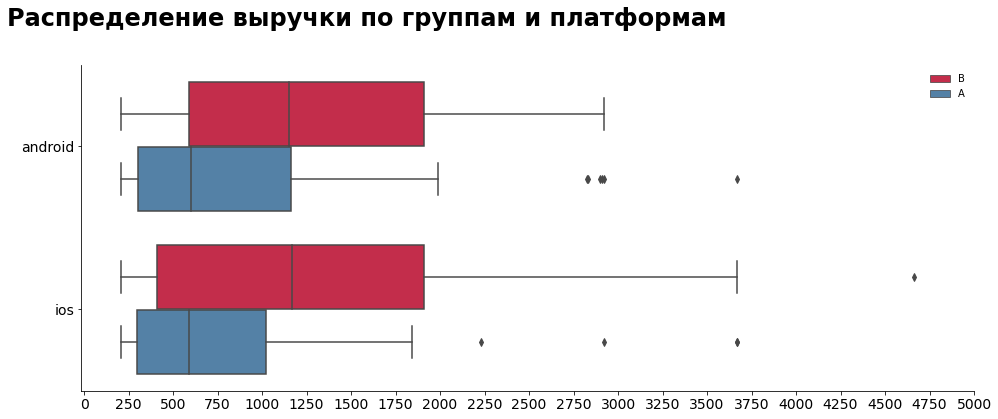

In [34]:
plt.figure(figsize = (16, 6))

sns.boxplot(
    x = df_2['revenue'],
    y = df_2['platform'],
    hue = df_2['group'],
    palette = ['crimson', 'steelblue'])

plt.xticks(range(0, 5001, 250),
           color = 'black',
           fontsize = 14)

plt.yticks(color = 'black',
           fontsize = 14)

plt.xlabel('')
plt.ylabel('')

plt.title(
    label = 'Распределение выручки по группам и платформам',
    x = 0.32,
    y = 1.1,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.legend(
    edgecolor = 'white',
    loc = 1)

sns.despine()

plt.show()

Проверим стат. значимость различий между распределениями по платформам.

In [35]:
for i in ['android', 'ios']:
    print(f'Результат для {i}')
    stat, p = stats.mannwhitneyu(df_2[df_2['platform'] == i][df_2[df_2['platform'] == i]['group'] == 'A']['revenue'], 
                                 df_2[df_2['platform'] == i][df_2[df_2['platform'] == i]['group'] == 'B']['revenue'])
    print(f'p-value = {p}')
    if p <= alpha:
        print('Reject H0')
    else:
        print('No reject H0')
    print()

Результат для android
p-value = 0.04925014637316891
Reject H0

Результат для ios
p-value = 0.0015426543641399385
Reject H0



Анализ показал:
* медианная выручку тестовой группы больше медианной выручки контрольной в разрезе обеих платформ
* гипотеза о равенстве распределений отклонена

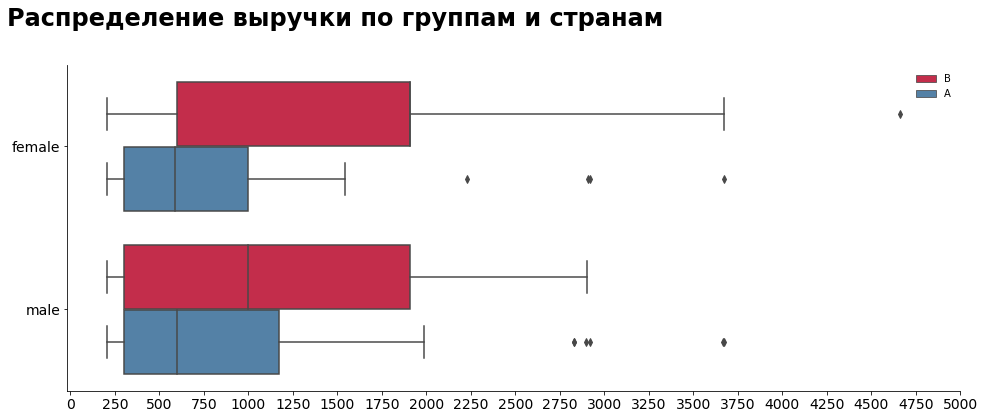

In [36]:
plt.figure(figsize = (16, 6))

sns.boxplot(
    x = df_2['revenue'],
    y = df_2['sex'],
    hue = df_2['group'],
    palette = ['crimson', 'steelblue'])

plt.xticks(range(0, 5001, 250),
           color = 'black',
           fontsize = 14)

plt.yticks(color = 'black',
           fontsize = 14)

plt.xlabel('')
plt.ylabel('')

plt.title(
    label = 'Распределение выручки по группам и странам',
    x = 0.3,
    y = 1.1,
    color = 'black',
    fontsize = 24,
    fontweight = 'bold')

plt.legend(
    edgecolor = 'white',
    loc = 1)

sns.despine()

plt.show()

Проверим стат. значимость различий между распределениями по полу.

In [37]:
for i in ['female', 'male']:
    print(f'Результат для {i}')
    stat, p = stats.mannwhitneyu(df_2[df_2['sex'] == i][df_2[df_2['sex'] == i]['group'] == 'A']['revenue'], 
                                 df_2[df_2['sex'] == i][df_2[df_2['sex'] == i]['group'] == 'B']['revenue'])
    print(f'p-value = {p}')
    if p <= alpha:
        print('Reject H0')
    else:
        print('No reject H0')
    print()

Результат для female
p-value = 0.0008191912980826493
Reject H0

Результат для male
p-value = 0.06326402745293058
No reject H0



Анализ показал:
* медианная выручка тестовой группы больше медианной выручки контрольной для обоих полов
* гипотеза о равенстве распределений отклонена для женщин

**Вывод по гипотезе 2:** Выручка тествой группы значительно увеличилась по сравнению с контрольной группой, и различия между выборками являются стат. значимыми для общего массива и в разрезе страт (за исключением мужчин). 

**Вывод по заданию 1:** 

Сопоставив результаты проверки обеих гипотез мы получим следующий результат: новая модель оплаты не оказала влияние на конверсию, но в тествой группе выручка больше, чем в контрольной и эти различия стат. значимы. 

Соответственно, можем сделать вывод, что пользователи, которые совершили покупку остались довольны новой системой оплаты и продолжили совершать покупки, что в свою очередь повлияло на выручку, но не повлияло на кол-во пользователей, которые совершили покупки.

Можем предположить, что многие пользователи просто не знали о новой модели оплаты.

**Представляется 2 варианта развития дальнейших событий:**
* перфекционистский (если есть ресурсы) - повторить эксперимент (увеличив информирование пользователей о новой модели оплаты) и сравнить результаты
* не перфекционистский (если нет ресурсов) - выкатить доработку (кол-во пользователей совершивших покупку хоть и не увеличилось, но и не уменьшилось, а выручка увеличилась (стат. значимая разница). Тем более пользователей контрольной группы значительно меньше пользователей тествой:

In [38]:
groups['group'].value_counts()

B    59883
A    14693
Name: group, dtype: int64

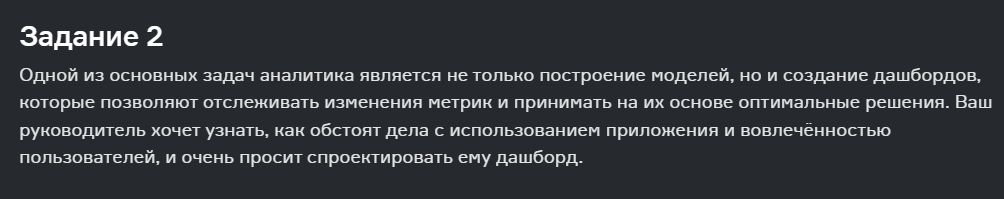

# Дашборд

*В качестве примера будет применен набор данных, который был использован для проверки гипотезы 2, т.к. в нём наибольшее кол-во параметров. Так как в условиях задания не указано с помощью какого инструмента сделать дашборд, то я сделаю его с помощью python и tableau.*

**Метрики, которые я бы использовал в дашборде:**
* воронка - позволяет получить общую информацию о конверсии пользователей (текст)
* retention rate (churn rate) - позволит выявить, если в приложении есть проблемы (узнать причину, по которой пользователи       отказались от дальнейшего использования приложения) (текст)
* ARPPU, ARPU, LTV, CAC, CPAcq - позволят оперативно оценить состояние продукта (текст)
* ROI - отражает эффективность вложений (текст)
* DAU за текущий день и предыдущий день в разрезе описательных параметров - позволит оперативно среагировать, если у             пользователей с определенной характеристикой возникли проблемы с приложением. К примеру: вышло обновление платформы, на         которой не поддерживается наше приложение (таблица)
* распределения выручки, прибыли, расходов в разрезе описательных параметров - позволяет оперативно оценить текущее состяние     продукта (гистограмма или boxplot)
* количественное соотношение пользователей в разрезе описательных параметров - позволяет получить более подробную информацию -   изучить пользователей (столбчатые диаграммы)
* топ пользователей по выручке - позволит сегментировать пользователей и проводить направленные маркетинговые кампании           (таблица)

Очень сложно определить первоочередные метрики, так они зависят от решаемой задачи. Если необходимо было бы получать оперативно информацию, которая давала бы общее представление, то я бы в качестве первоочередных метрик выделил воронку, retention rate, ARPPU, ARPU, LTV, CAC, CPAcq, ROI, DAU.

*К сожалению, в наборе данных для проекта 4 имеются не все необходимые данные для расчета вышеописанных метрик, поэтому часть из них не будет применена на дашборде. Для удобства я оставлю ссылки на дашборды.*

**Ссылки:**
* google colab (в gitlab не отображается plotly) - https://colab.research.google.com/drive/1bswsha6K70svG_NQAG5i0UjpttKDtxXS?usp=sharing
* tableau - https://public.tableau.com/app/profile/artem2829/viz/Book1_16384675005290/Dashboard1?publish=yes

**Описание:**

Дашборд состоит из 4 разделов, которые переключаются с помощью кнопки:

1. Общая информация про пользователей
    * кол-во пользователей (воронка)
    * распределение выручки (boxplot - описательные харктеристики)
    * распределение выручки (histplot - частота распределения данных)
    * топ 5 пользователей (выручка)
2. Информация про пользователей в разрезе стран
    * кол-во пользователей из России и Швеции
    * распределение выручки (boxplot)
    * распределение выручки (histplot)
    * топ 5 пользователей из России и Швеции
3. Информация про прользователей в разрезе платформ
    * кол-во пользователей на android и ios
    * распределение выручки (boxplot)
    * распределение выручки (histplot)
    * топ 5 пользователей (выручка) на android и ios
4. Информация про пользователей в разрезе пола
    * кол-во мужчин и женщин
    * распределение выручки (boxplot)
    * распределение выручки (histplot)
    * топ 5 пользователей (выручка) среди мужчин и женщин

In [39]:
# создание таблиц
# общая
top_5_all = df_2[['user_id', 'revenue']].sort_values('revenue', ascending = False).head()

# страны
top_5_rus = df_2[df_2['country'] == 'Russia'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_rus = top_5_rus.rename(columns = {'user_id' : 'user_id_rus', 'revenue' : 'revenue_rus'})

top_5_swe = df_2[df_2['country'] == 'Sweden'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_swe = top_5_swe.rename(columns = {'user_id' : 'user_id_swe', 'revenue' : 'revenue_swe'})

# платформы
top_5_and = df_2[df_2['platform'] == 'android'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_and = top_5_and.rename(columns = {'user_id' : 'user_id_and', 'revenue' : 'revenue_and'})

top_5_ios = df_2[df_2['platform'] == 'ios'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_ios = top_5_ios.rename(columns = {'user_id' : 'user_id_ios', 'revenue' : 'revenue_ios'})

# пол
top_5_male = df_2[df_2['sex'] == 'male'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_male = top_5_male.rename(columns = {'user_id' : 'user_id_male', 'revenue' : 'revenue_male'})

top_5_female = df_2[df_2['sex'] == 'female'][['user_id', 'revenue']].sort_values('revenue', ascending = False).head()
top_5_female = top_5_female.rename(columns = {'user_id' : 'user_id_female', 'revenue' : 'revenue_female'})


fig = make_subplots(rows = 2, cols = 2,
                   subplot_titles=('Количество', 'Выручка', 'Выручка', 'Топ 5'),
                   specs = [[{"type": "xy"}, {"type": "xy"}],
                           [{"type": "xy"}, {"type": "table"}]])

# общая
fig.add_trace(go.Bar(
    visible = True,
    x = ['Всего', 'Активных', 'Что-то купили'],
    y = [groups['user_id'].nunique(), users['user_id'].nunique(), df_2['user_id'].nunique()],
    text = [groups['user_id'].nunique(), users['user_id'].nunique(), df_2['user_id'].nunique()],
    textposition = 'outside',
    textfont = dict(
        color = 'black',
        size = 11),
    marker = dict(
        color = '#FFDEAD',
        line = dict(
            color = 'black',
            width = 2))),
                row = 1,
                col = 1)

fig.add_trace(go.Box(
    visible = True,
    y = df_2['revenue'],
    line_color = 'black',
    name = ' ',
    fillcolor = '#FFDEAD'),
             row = 1,
             col = 2)

fig.add_trace(go.Histogram(
    visible = True,
    x = df_2['revenue'],
    marker_color = '#FFDEAD',
    xbins = dict(
        size = 400)),
             row = 2,
             col = 1)

fig.add_trace(go.Table(
    visible = True,
    columnwidth = [20, 20],
    header = dict(
        values = ['user_id', 'revenue'],
        fill_color = '#FFDEAD',
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black')),
    cells = dict(
        values = [top_5_all['user_id'], top_5_all['revenue']],
        fill_color = 'white',
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black'))),
             row = 2,
             col = 2)

# страна
fig.add_trace(go.Bar(
    visible = False,
    x = df_2['country'].value_counts().index,
    y = df_2['country'].value_counts(),
    text = df_2['country'].value_counts(),
    textposition = 'outside',
    textfont = dict(
        color = 'black',
        size = 11),
    marker = dict(
        color = ['crimson', 'royalblue'],
        line = dict(
            color = 'black',
            width = 2))),
                row = 1,
                col = 1)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['country']=='Russia']['revenue'],
    line_color = 'black',
    fillcolor = 'crimson',
    name = 'Russia'),
             row = 1,
             col = 2)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['country']=='Sweden']['revenue'],
    line_color = 'black',
    fillcolor = 'royalblue',
    name = 'Sweden'),
             row = 1,
             col = 2)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['country']=='Russia']['revenue'],
    marker_color = 'crimson',
    xbins = dict(
        size = 300)),
             row = 2,
             col = 1)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['country']=='Sweden']['revenue'],
    marker_color = 'royalblue',
    xbins = dict(
        size = 300)),
             row = 2,
             col = 1)

fig.add_trace(go.Table(
    visible = False,
    columnwidth = [20, 20],
    header = dict(
        values = ['user_id_rus', 'revenue_rus', 'user_id_swe', 'revenue_swe'],
        fill_color = ['crimson', 'crimson', 'royalblue', 'royalblue'],
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black')),
    cells = dict(
        values = [top_5_rus['user_id_rus'], top_5_rus['revenue_rus'], top_5_swe['user_id_swe'], top_5_swe['revenue_swe']],
        fill_color = 'white',
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black'))),
             row = 2,
             col = 2)

# платформа
fig.add_trace(go.Bar(
    visible = False,
    x = df_2['platform'].value_counts().index,
    y = df_2['platform'].value_counts(),
    text = df_2['platform'].value_counts(),
    textposition = 'outside',
    textfont = dict(
        color = 'black',
        size = 11),
    marker = dict(
        color = ['#A4C639', 'silver'],
        line = dict(
            color = 'black',
            width = 2))),
                row = 1,
                col = 1)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['platform']=='android']['revenue'],
    line_color = 'black',
    fillcolor = '#A4C639',
    name = 'android'),
             row = 1,
             col = 2)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['platform']=='ios']['revenue'],
    line_color = 'black',
    fillcolor = 'silver',
    name = 'ios'),
             row = 1,
             col = 2)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['platform']=='android']['revenue'],
    marker_color = '#A4C639',
    xbins = dict(
        size = 300)),
             row = 2,
             col = 1)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['platform']=='ios']['revenue'],
    marker_color = 'silver',
    xbins = dict(
        size = 300)),
             row = 2,
             col = 1)

fig.add_trace(go.Table(
    visible = False,
    columnwidth = [20, 20],
    header = dict(
        values = ['user_id_and', 'revenue_and', 'user_id_ios', 'revenue_ios'],
        fill_color = ['#A4C639', '#A4C639', 'silver', 'silver'],
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black')),
    cells = dict(
        values = [top_5_and['user_id_and'], top_5_and['revenue_and'], top_5_ios['user_id_ios'], top_5_ios['revenue_ios']],
        fill_color = 'white',
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black'))),
             row = 2,
             col = 2)

# пол
fig.add_trace(go.Bar(
    visible = False,
    x = df_2['sex'].value_counts().index,
    y = df_2['sex'].value_counts(),
    text = df_2['sex'].value_counts(),
    textposition = 'outside',
    textfont = dict(
        color = 'black',
        size = 11),
    marker = dict(
        color = ['lightseagreen', 'pink'],
        line = dict(
            color = 'black',
            width = 2))),
                row = 1,
                col = 1)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['sex']=='male']['revenue'],
    line_color = 'black',
    fillcolor = 'lightseagreen',
    name = 'male'),
             row = 1,
             col = 2)

fig.add_trace(go.Box(
    visible = False,
    y = df_2[df_2['sex']=='female']['revenue'],
    line_color = 'black',
    fillcolor = 'pink',
    name = 'female'),
             row = 1,
             col = 2)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['sex']=='male']['revenue'],
    marker_color = 'lightseagreen',
    xbins = dict(
        size = 300)),
             row = 2,
             col = 1)

fig.add_trace(go.Histogram(
    visible = False,
    x = df_2[df_2['sex']=='female']['revenue'],
    marker_color = 'pink',
    xbins = dict(
        size = 200)),
             row = 2,
             col = 1)

fig.add_trace(go.Table(
    visible = False,
    columnwidth = [20, 20],
    header = dict(
        values = ['user_id_male', 'revenue_male', 'user_id_female', 'revenue_female'],
        fill_color = ['lightseagreen', 'lightseagreen', 'pink', 'pink'],
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black')),
    cells = dict(
        values = [top_5_male['user_id_male'], top_5_male['revenue_male'], top_5_female['user_id_female'], 
                  top_5_female['revenue_female']],
        fill_color = 'white',
        line_color = 'black',
        align = 'left',
        font = dict(
            color = 'black'))),
             row = 2,
             col = 2)


# кнопки
fig.update_layout(
    font_family = 'Droid Serif',
    title_font_family = 'Droid Serif',
    font_color = 'black',
    title_font_color = 'black',
    title_font_size = 18,
    showlegend = False,
    height = 850, 
    width = 950,
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    updatemenus = [
            dict(
                type = 'dropdown',
                active = 0,
                x = 0.1,
                y = 1.1,
                buttons = list([
                    dict(
                        label = 'Общая',
                        method = 'update',
                        args = [{'visible' : [True, True, True, True, False, False, False, False, False, False, False, 
                                              False, False, False, False, False, False, False, False, False, False, False]}]),
                    dict(
                        label = 'Страна',
                        method = 'update',
                        args = [{'visible' : [False, False, False, False, True, True, True, True, True, True, False,
                                              False, False, False, False, False, False, False, False, False, False, False]}]),
                    dict(
                        label = 'Платформа',
                        method = 'update',
                        args = [{'visible' : [False, False, False, False, False, False, False, False, False, False,
                                              True, True, True, True, True, True, False, False, False, False, False, False]}]),
                   dict(
                        label = 'Пол',
                        method = 'update',
                        args = [{'visible' : [False, False, False, False, False, False, False, False, False, False, False, 
                                              False, False, False, False, False, True, True, True, True, True, True]}])
                ])
            )
    ])


fig.show()

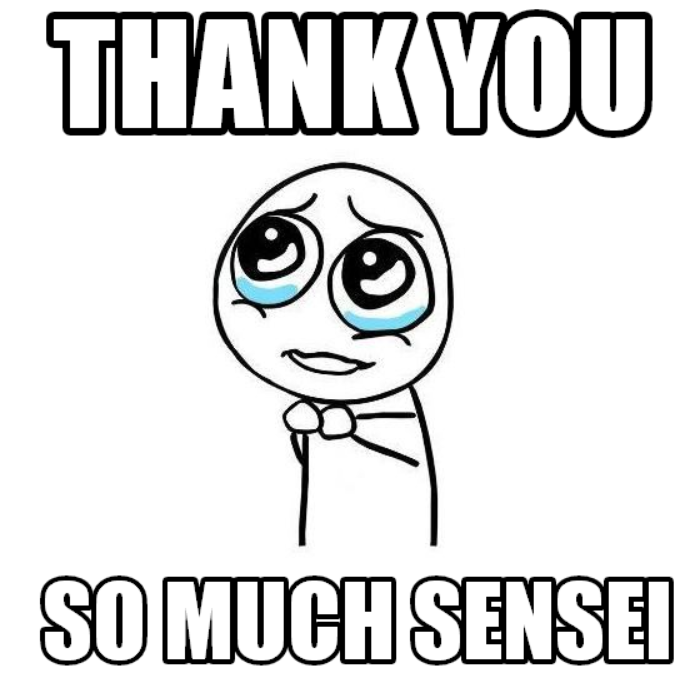